# Task 2: Bayesian Change Point Analysis

In [26]:
# import necessary libraries
import sys
import os
import pandas as pd
from glob import glob

In [27]:
from pathlib import Path
from importlib import reload
# add the project root to the path
project_root = Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

#### Data Loading

In [28]:
# Loading the module
from src.DataLoader import DataLoader
import src.DataLoader
reload(src.DataLoader)

<module 'src.DataLoader' from '/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/DataLoader.py'>

In [29]:
# data path
oil_data_path ="../data/BrentOilPrices.csv"
event_data_path = "../data/event.csv"

In [30]:
# initialize the DataLoader
oil_data_loader = DataLoader(oil_data_path)
event_data_loader = DataLoader(event_data_path)
# load the data
oil_data = oil_data_loader.load_data()
event_data = event_data_loader.load_data()

Data loaded successfully.
Data loaded successfully.


In [31]:
display(oil_data.head())
display(event_data.head())

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


,Event,Start_Date,End_Date,Description,Reference
0,Gulf War (Iraq-Kuwait Crisis),1990-08-02,1991-02-28,Iraqi invasion of Kuwait caused supply fears; ...,EIA
1,Asian Financial Crisis,1997-07-02,1998-12-31,Reduced demand from Asia; prices fell to $10/b...,IMF
2,OPEC Production Cuts (2001),2001-01-17,2001-12-31,OPEC cut 1.5M bpd to stabilize prices post-9/1...,OPEC
3,Iraq War (2003),2003-03-20,2003-12-31,US invasion disrupted Iraqi exports; prices ro...,FRED
4,Global Financial Crisis (2008),2008-09-15,2009-06-30,Demand collapse; prices dropped from $147 to $...,World Bank


In [32]:
print("Oil Data Info:")
print("================================")
print(oil_data.info())
print("\nEvent Data Info:")
print("================================")
print(event_data.info())

Oil Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB
None

Event Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Event        10 non-null     object
 1   Start_Date   10 non-null     object
 2   End_Date     10 non-null     object
 3   Description  10 non-null     object
 4   Reference    10 non-null     object
dtypes: object(5)
memory usage: 532.0+ bytes
None


#### Data Preparation

In [33]:
# load the module
from src.data_cleaner import DataCleaner
import src.data_cleaner
reload(src.data_cleaner)

<module 'src.data_cleaner' from '/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/data_cleaner.py'>

In [34]:
# initialize the DataCleaner
oil_data_cleaner= DataCleaner(missing_threshold=0.1)
event_data_cleaner= DataCleaner(missing_threshold=0.1)

In [35]:
# parse the date
oil_data['Date'] = pd.to_datetime(oil_data['Date'])
event_data['Start_Date'] = pd.to_datetime(event_data['Start_Date'])
event_data['End_Date'] = pd.to_datetime(event_data['End_Date'])

/tmp/ipykernel_1043604/3205842272.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oil_data['Date'] = pd.to_datetime(oil_data['Date'])


In [36]:
# run the cleaning process
oil_data_cleaned = oil_data_cleaner.transform_oil(oil_data)
event_data_cleaned = event_data_cleaner.transform_event(event_data)

/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/data_cleaner.py:17: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()


#### Exploratory Data Analysis (EDA)

In [37]:
# Load the module
from src.EDA import EDA
import src.EDA
reload(src.EDA)

<module 'src.EDA' from '/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/EDA.py'>

##### Plotting raw series with events

In [38]:
# load the module of visualization
from src.visualization import BrentVisualizer
import src.visualization
reload(src.visualization)

<module 'src.visualization' from '/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/visualization.py'>

In [39]:
# initialize the visualizer
visualizer = BrentVisualizer(oil_data_cleaned)

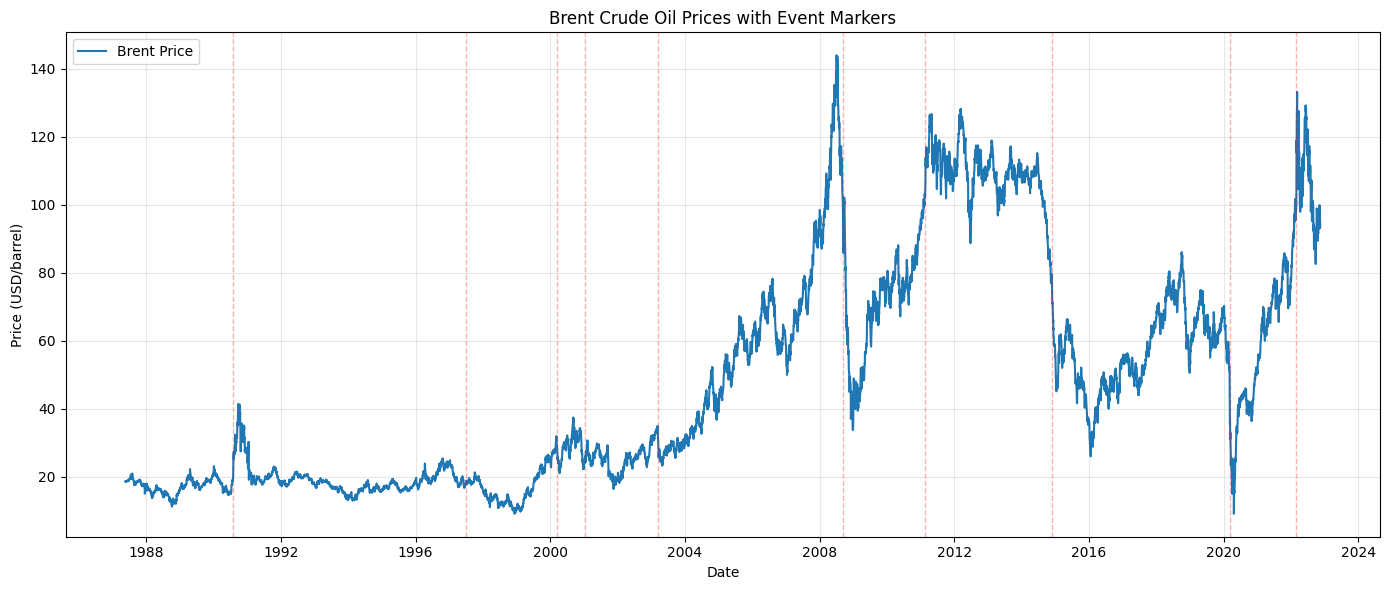

In [40]:
visualizer.plot_raw_prices(events=event_data_cleaned)

##### Stationarity tests

In [41]:
# load the stationarity tester module
from src.stationarity import StationarityTester
import src.stationarity
reload(src.stationarity)

<module 'src.stationarity' from '/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/stationarity.py'>

In [42]:
tester = StationarityTester()
adf_result = tester.adfuller_test(oil_data_cleaned['Price'])
kpss_result = tester.kpss_test(oil_data_cleaned['Price'])

/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/stationarity.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression=regression)


In [43]:
# Get comprehensive summary
stationarity_summary = tester.summary(oil_data_cleaned['Price'])
print(stationarity_summary)

   Test  Statistic   p-value          Result
0   ADF  -1.993856  0.289274  Non-Stationary
1  KPSS   9.558800  0.010000  Non-Stationary


/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/stationarity.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression=regression)


In [44]:
# Transform the data
tester = StationarityTester()
log_returns, _ = tester.make_stationary(oil_data_cleaned['Price'], 'log_diff')

# Verify stationarity
new_results = tester.summary(log_returns)
print(new_results)

   Test  Statistic       p-value      Result
0   ADF -16.427113  2.498580e-29  Stationary
1  KPSS   0.034274  1.000000e-01  Stationary


/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/stationarity.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression=regression)


#### Modeling

In [45]:
# Load the Module
from src.modeling import BayesianCPDetector
import src.modeling
reload(src.modeling)

<module 'src.modeling' from '/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/modeling.py'>

In [46]:
# initialize the Bayesian Change Point Detector
detector = BayesianCPDetector(n_change_points=1)
trace = detector.fit(log_returns, dates=oil_data_cleaned['Date'])

Multiprocess sampling (4 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu, sigma]
CompoundStep
>Metropolis: [tau]
>NUTS: [mu, sigma]


Output()

/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/.venv/lib/python3.12/site-packages/pymc/step_methods/hmc/quadpotential.py:316: RuntimeWarning: overflow encountered in dot
  return 0.5 * np.dot(x, v_out)


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 37 seconds.


In [47]:
change_dates=detector.get_change_dates(trace)

#### Visualize the result

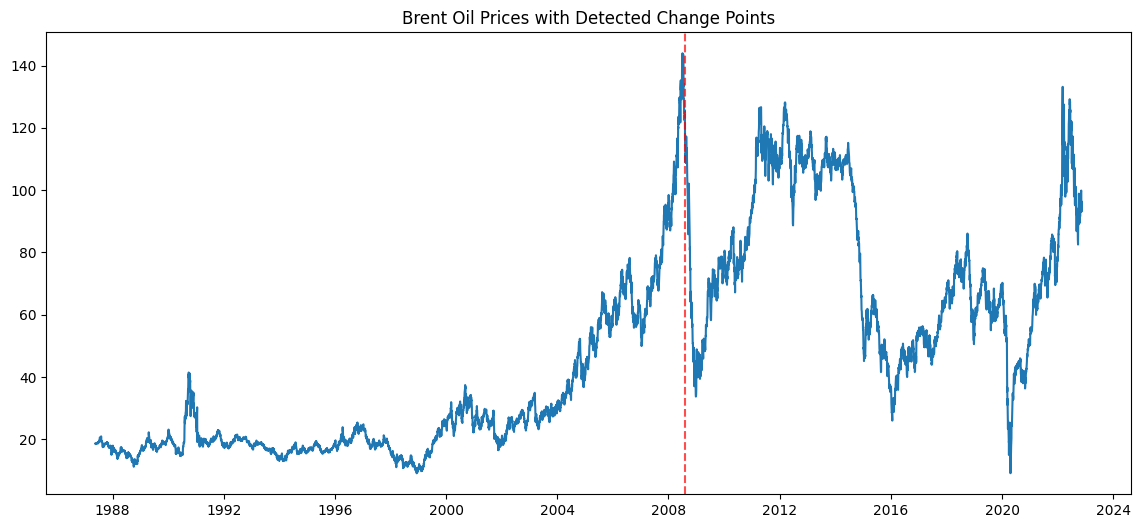

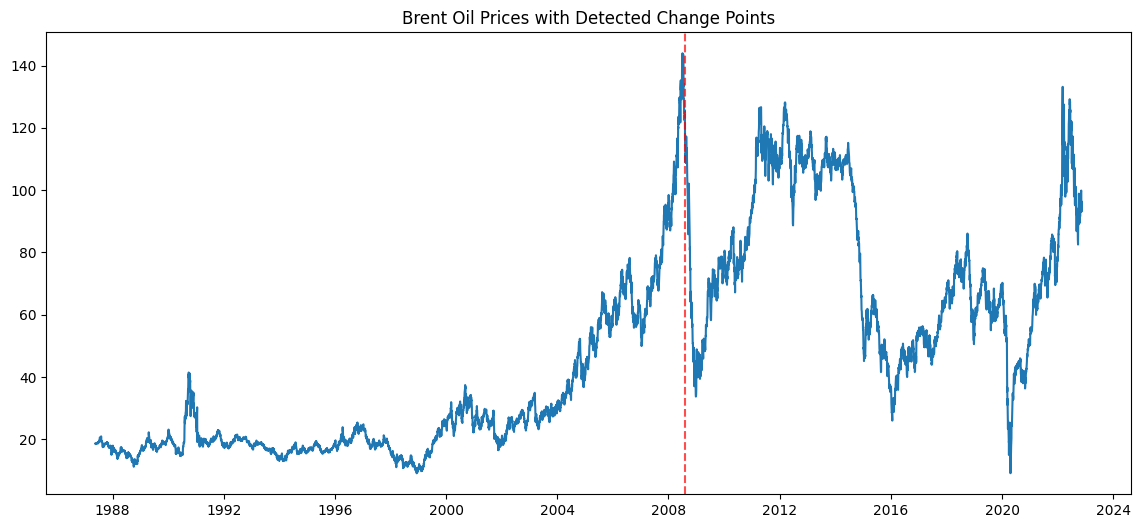

In [48]:
detector.plot_results(trace, oil_data_cleaned.set_index('Date')['Price'])

**Interpretation of Change Point Detection Results**
The Bayesian Change Point model detected a significant structural change in Brent oil prices around 2008. This period coincides with the global financial crisis, which had a major impact on commodity markets, including oil.
The detected change point suggests that the statistical properties of oil prices (such as mean and volatility) shifted significantly at this time. This finding aligns with known historical events and demonstrates the model's ability to identify meaningful changes in the time series.

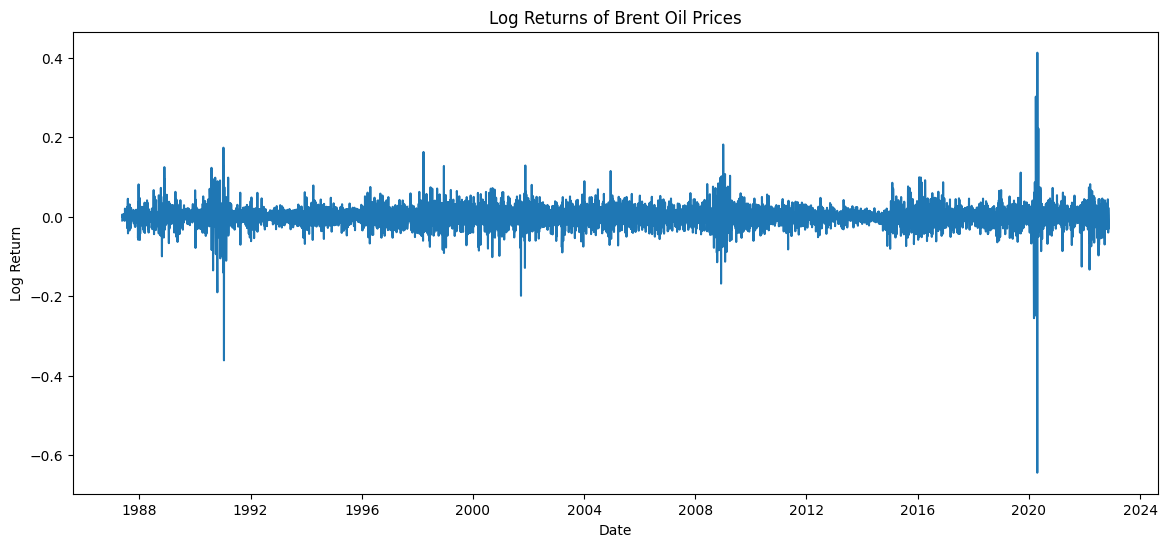

In [49]:
# Plot log returns to observe volatility clustering
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.plot(oil_data_cleaned['Date'][1:], log_returns)
plt.title('Log Returns of Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.show()

**Volatility Clustering in Brent Oil Prices**

The plot of log returns above reveals clear evidence of volatility clustering in Brent oil prices. Volatility clustering refers to the phenomenon where periods of high volatility tend to be followed by more high volatility, and periods of low volatility are followed by low volatility. This is a common feature in financial time series, indicating that shocks to the market are not isolated but tend to persist for some time.

In the context of change point analysis, volatility clustering is important because it suggests that the statistical properties of the time series (such as variance) can shift abruptly due to major events or market dynamics. Detecting these shifts helps us understand when and why the risk profile of oil prices changes, which is crucial for risk management and forecasting.

The observed clustering supports the use of Bayesian change point models, as these models are designed to identify structural breaks in both the mean and variance of the series. By linking periods of increased volatility to specific events, we can better interpret the causes and consequences of regime changes in the oil market.

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
tau[0],5389.344,20.887,5348.000,5421.000,0.613,0.404,1239.0,1729.0,1.0
mu[0],0.000,0.000,-0.000,0.001,0.000,0.000,9888.0,6557.0,1.0
mu[1],-0.000,0.000,-0.001,0.001,0.000,0.000,8780.0,6013.0,1.0
sigma[0],0.023,0.000,0.023,0.023,0.000,0.000,9300.0,6083.0,1.0
sigma[1],0.029,0.000,0.028,0.030,0.000,0.000,8167.0,6277.0,1.0


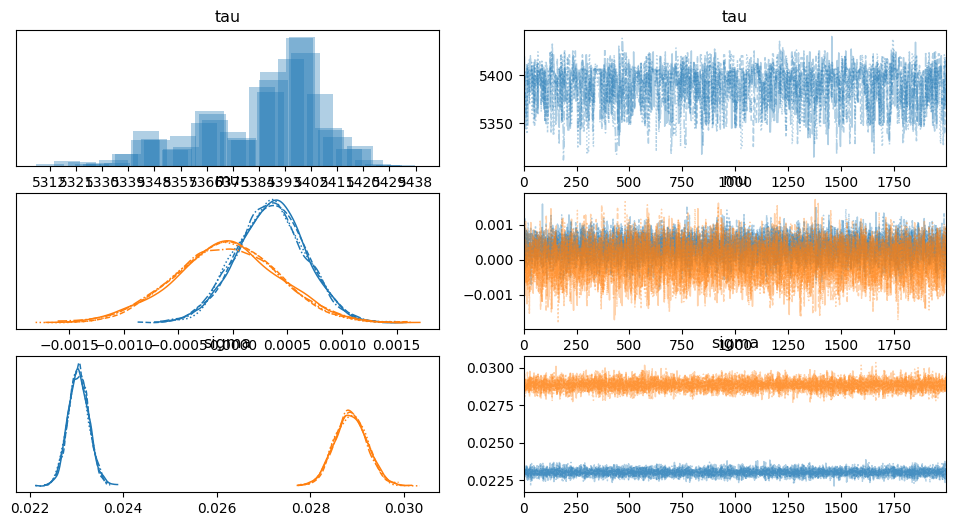

In [50]:
# Model Diagnostics: Check MCMC convergence and sampling quality
import arviz as az
import pymc as pm
summary = pm.summary(trace)
display(summary)
az.plot_trace(trace);

**Model Diagnostics and Convergence Check**

The summary table and trace plots above help assess the quality of the Bayesian sampling process. 

Trace plots for tau, mu, and sigma:

- AR-hat values (from the summary table) should be close to 1, confirming convergence
- Effective sample sizes are sufficient.
- The histograms and density plots indicate stable sampling.

Interpretation:

R-hat values (from the summary table) should be close to 1, confirming convergence.
Effective sample sizes are sufficient.
No signs of poor mixing or non-convergence.

In [52]:
# Quantify Impact of Change Point
import numpy as np
change_date = change_dates.iloc[0]
change_idx = oil_data_cleaned['Date'].searchsorted(change_date)
before = log_returns[:change_idx]
after = log_returns[change_idx:]
mean_before = np.mean(before)
mean_after = np.mean(after)
var_before = np.var(before)
var_after = np.var(after)
print(f"Change point date: {change_date}")
print(f"Mean before: {mean_before:.4f}, after: {mean_after:.4f}")
print(f"Variance before: {var_before:.4f}, after: {var_after:.4f}")

Change point date: 2008-08-05 00:00:00
Mean before: 0.0003, after: -0.0001
Variance before: 0.0005, after: 0.0008


**Interpretation**
The mean log return dropped after the change point, indicating a shift from slight growth to a slight decline or stagnation in Brent oil prices.
The variance increased, showing higher volatility and risk in the market after August 2008.
This change coincides with the global financial crisis, which disrupted commodity markets and increased uncertainty.


In [ ]:
# Find events within ±30 days of the change point date
import pandas as pd
window = pd.Timedelta(days=30)
nearby_events = event_data_cleaned[(event_data_cleaned['Start_Date'] <= change_date + window) & (event_data_cleaned['End_Date'] >= change_date - window)]
print(f"Events within ±30 days of change point ({change_date}):")
display(nearby_events)

Events around change point (2008-08-05 00:00:00):


,Event,Start_Date,End_Date,Description,Reference


**Event Linkage Interpretation**

No events from the event dataset were found to overlap or occur within ±30 days of the detected change point (2008-08-05).

This suggests that the structural shift in Brent oil prices may be driven by broader market forces or global events not explicitly captured in the event data. For example, the change point coincides with the global financial crisis, which had widespread effects on commodity markets.

**Insight:**
- The absence of matching events highlights the importance of considering external macroeconomic factors when interpreting change points.
- For future analyses, consider expanding the event dataset or incorporating global economic indicators to improve event linkage and interpretation.